Operations sorted by execution time (duration):
Operation: matmul, dtype:F32, Duration: 0.5863802880000001, Count: 14026
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.287060992, Count: 12240
Operation: copy_strided dtype:F32, Duration: 0.143393792, Count: 12216
Operation: copy strided dtype:F32, Duration: 0.07479296, Count: 3048
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.061763584, Count: 6120
Operation: rms_norm, dtype:F32, Duration: 0.043633664, Count: 3315
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.036872192, Count: 1524
Operation: reduce op:Max, dtype:F32, Duration: 0.03538432, Count: 1530
Operation: binary op:Div, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.034966528000000004, Count: 1524
Operation: reduce op:Sum, dtype:F32, Duration: 0.034039808, Count: 1530
Operation: unary op:Affine, dtype:F32, pipeline:UnaryFromBufferContiguous, Duratio

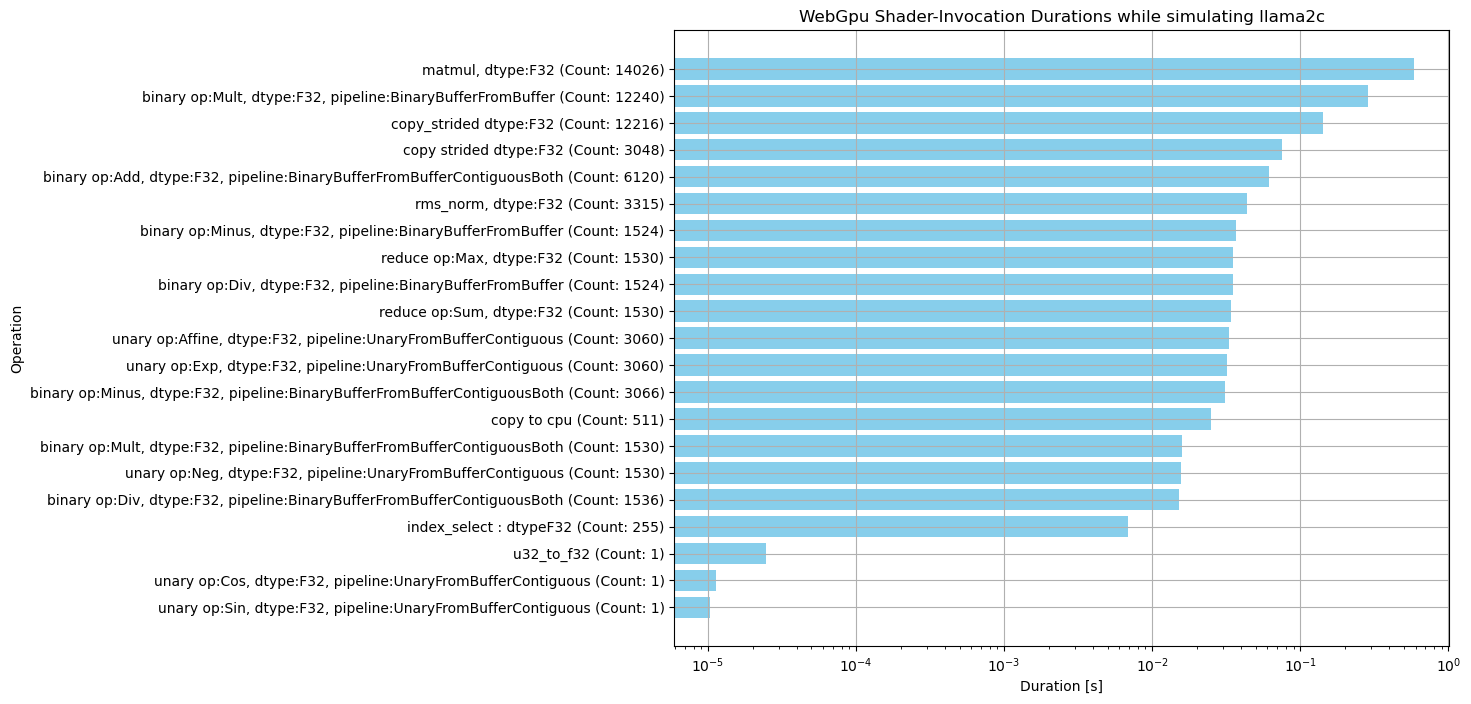

total_sum: 1.5124961279999998


In [24]:
import json
import matplotlib.pyplot as plt

# Load JSON data from a file
with open('candle-examples\wgpu_infollama2-c_small.json', 'r') as file:
    data = json.load(file)

    # Add a new key for duration to each operation
for operation in data:
    operation['duration'] = operation['count'] * operation['mean']

# Sort the list of operations by duration in descending order
sorted_operations = sorted(data, key=lambda x: x['duration'], reverse=True)


# Extract labels and durations for plotting
labels = [f"{op['label']} (Count: {op['count']})" for op in sorted_operations]
#labels = [op['label'] for op in sorted_operations]
durations = [op['duration'] for op in sorted_operations]
total_sum = sum(durations)
print(f"total_sum: {sum(durations)}")

# Print the operations along with their durations
print("Operations sorted by execution time (duration):")
for operation in sorted_operations:
    print(f"Operation: {operation['label']}, Duration: {operation['duration']}, Count: {operation['count']} Perc:{operation['duration']/total_sum}")


# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(labels, durations, color='skyblue')
plt.grid()
plt.xscale('log')
plt.xlabel('Duration [s]')
plt.ylabel('Operation')
plt.title('WebGpu Shader-Invocation Durations while simulating llama2c')
plt.gca().invert_yaxis()  # To have the longest duration at the top
plt.show()

